In [1]:
!pip install imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/


In [5]:
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download navoneel/brain-mri-images-for-brain-tumor-detection

 60% 9.00M/15.1M [00:00<00:00, 83.0MB/s]
100% 15.1M/15.1M [00:00<00:00, 115MB/s] 


In [7]:
!unzip brain-mri-images-for-brain-tumor-detection

Archive:  brain-mri-images-for-brain-tumor-detection.zip
  inflating: brain_tumor_dataset/no/1 no.jpeg  
  inflating: brain_tumor_dataset/no/10 no.jpg  
  inflating: brain_tumor_dataset/no/11 no.jpg  
  inflating: brain_tumor_dataset/no/12 no.jpg  
  inflating: brain_tumor_dataset/no/13 no.jpg  
  inflating: brain_tumor_dataset/no/14 no.jpg  
  inflating: brain_tumor_dataset/no/15 no.jpg  
  inflating: brain_tumor_dataset/no/17 no.jpg  
  inflating: brain_tumor_dataset/no/18 no.jpg  
  inflating: brain_tumor_dataset/no/19 no.jpg  
  inflating: brain_tumor_dataset/no/2 no.jpeg  
  inflating: brain_tumor_dataset/no/20 no.jpg  
  inflating: brain_tumor_dataset/no/21 no.jpg  
  inflating: brain_tumor_dataset/no/22 no.jpg  
  inflating: brain_tumor_dataset/no/23 no.jpg  
  inflating: brain_tumor_dataset/no/24 no.jpg  
  inflating: brain_tumor_dataset/no/25 no.jpg  
  inflating: brain_tumor_dataset/no/26 no.jpg  
  inflating: brain_tumor_dataset/no/27 no.jpg  
  inflating: brain_tumor_datase

In [8]:
#importing libaries
import numpy as np 
import pandas as pd
import random as rd
import os

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from PIL import Image

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from keras.metrics import accuracy
from keras.applications.vgg16 import VGG16

#setting seed for reproducability
from numpy.random import seed
seed(25)
tf.random.set_seed(50)

In [9]:
!pip install -Uqq fastbook
import fastbook

import warnings 
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 88.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [10]:
from fastbook import *

In [11]:
path = Path('../content/brain_tumor_dataset')

In [12]:
# for i in range(5):
#     fig = plt.figure(figsize=(70,70))
#     plt.subplot(5,5,i+1)
#     image = plt.imshow(data[i])
#     plt.show(image)

In [13]:
Object_types = 'no','yes' 

# two types of category 

In [14]:
Object_types = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

#The most important parameter valid_pct=0.2. 
#This hold out 20% of the data.
#This 20% of the data is called the validation set;
#the remaining 80% is called the training set.
#seed=42 means same validation set every time 
#so if accuracy improve means model improve not because of data

In [15]:
dls = Object_types.dataloaders(path)

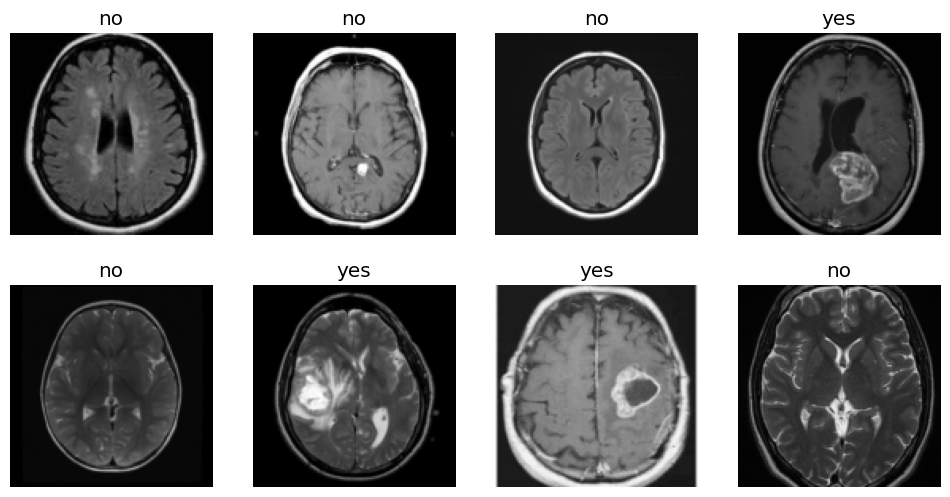

In [16]:
dls.valid.show_batch(max_n=8, nrows=2)

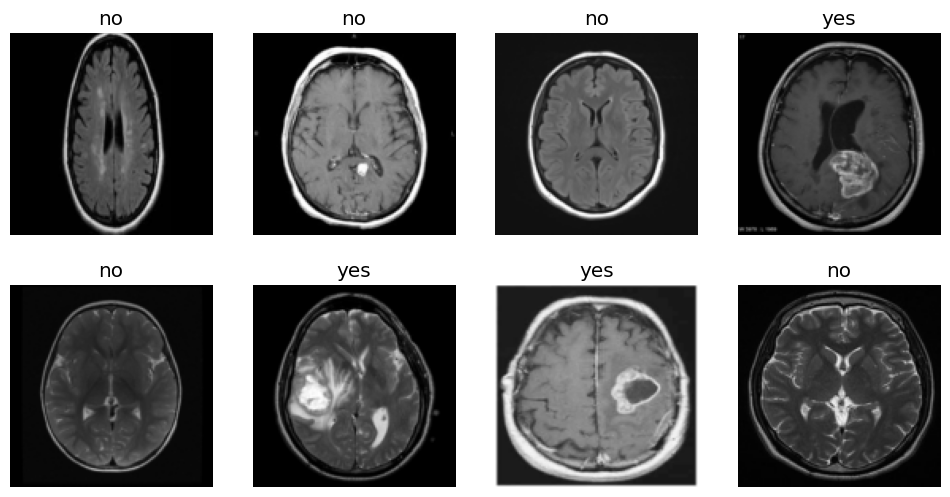

In [17]:
Object_types = Object_types.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = Object_types.dataloaders(path)
dls.valid.show_batch(max_n=8, nrows=2)

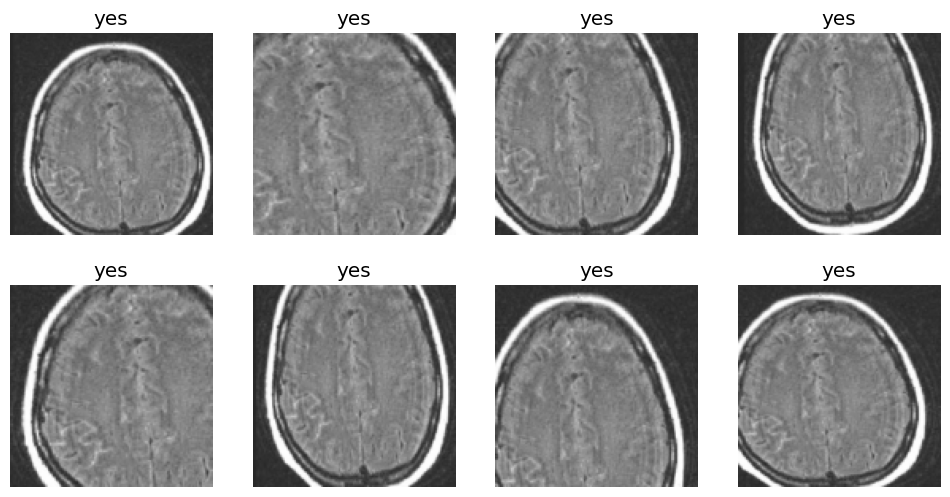

In [18]:
Object_types = Object_types.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = Object_types.dataloaders(path,bs=64)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

# cropmethod avoid the overfitting 

In [19]:
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(5)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 210MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,1.319729,1.847354,0.440000,00:24


epoch,train_loss,valid_loss,accuracy,time
0,0.902461,1.625680,0.440000,00:29
1,0.775957,0.922362,0.620000,00:20
2,0.673856,0.630912,0.720000,00:22
3,0.604083,0.530141,0.840000,00:20
4,0.563704,0.516131,0.860000,00:24


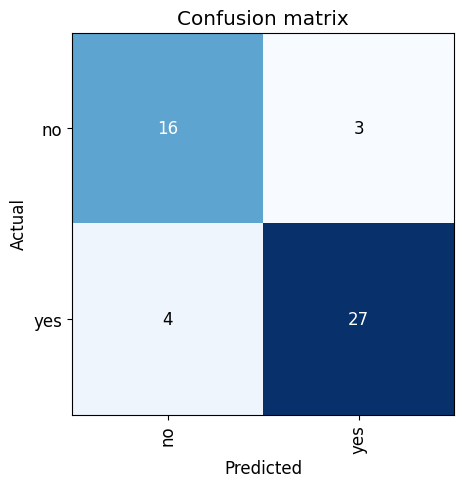

In [20]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [21]:
learn1 = cnn_learner(dls, resnet34, metrics=accuracy)
learn1.fine_tune(5)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 300MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,1.429775,0.915177,0.580000,00:26


epoch,train_loss,valid_loss,accuracy,time
0,0.860000,0.619167,0.680000,00:36
1,0.799776,0.331787,0.920000,00:38
2,0.682909,0.261982,0.880000,00:36
3,0.631797,0.277787,0.880000,00:38
4,0.577792,0.282072,0.860000,00:37


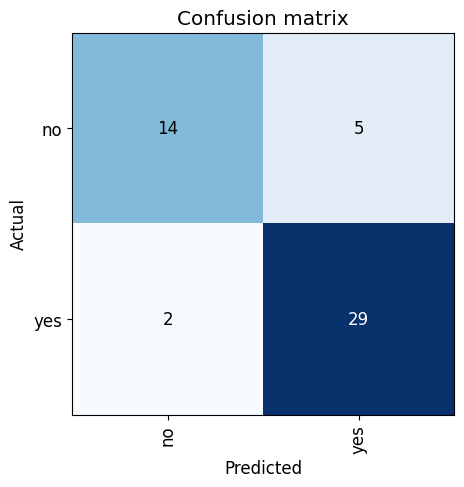

In [22]:
interp = ClassificationInterpretation.from_learner(learn1)
interp.plot_confusion_matrix()

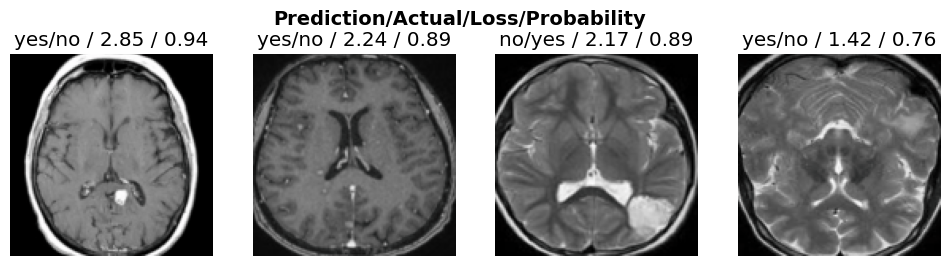

In [23]:
interp.plot_top_losses(4, nrows=1)

In [24]:
from fastai.vision.widgets import *

In [25]:
learn.export()

In [26]:
path = Path()
path.ls(file_exts='.pkl')


(#1) [Path('export.pkl')]

In [27]:
learn_inf = load_learner(path/'export.pkl')

In [28]:
learn_inf.predict('../content/brain_tumor_dataset/no/10 no.jpg')

('no', tensor(0), tensor([0.9659, 0.0341]))

In [29]:
learn_inf.dls.vocab

['no', 'yes']

In [30]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [31]:
btn_upload = SimpleNamespace(data = ['../content/brain_tumor_dataset/no/17 no.jpg'])

In [32]:
img = PILImage.create(btn_upload.data[-1])

In [33]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [34]:
pred,pred_idx,probs = learn_inf.predict(img)

In [35]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: no; Probability: 0.9985')

In [36]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [37]:
def on_click_classify(change):
 img = PILImage.create(btn_upload.data[-1])
 out_pl.clear_output()
 with out_pl: display(img.to_thumb(128,128))
 pred,pred_idx,probs = learn_inf.predict(img)
 lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
btn_run.on_click(on_click_classify)

In [38]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [39]:
VBox([widgets.Label('Select your image!'),
      btn_upload, btn_run, out_pl, lbl_pred])